In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
# Load the dataset
file_path = 'Data Set/API_SP.POP.TOTL_DS2_en_csv_v2_6011311.csv'
df = pd.read_csv(file_path, skiprows=4)

# Remove any extra unnamed column if present
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [2]:
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720839314.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0,1761985.0
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,...,26984002.0,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0,33696614.0
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,...,53873616.0,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0,59893885.0
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,...,15234976.0,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0,20017675.0


In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning)  # Add this line to ignore the specific FutureWarning
# Handling null values by forward-filling
df.fillna(method='ffill', axis=0, inplace=True)

# Data Visulization


### 1. Global Population Trend 
This line graph shows the total world population for each year from 1960 to 2022. The x-axis represents the years, and the y-axis shows the total population. The line on the graph goes up or down, indicating how the world's population has increased or changed over time. A rising line means an increasing population.

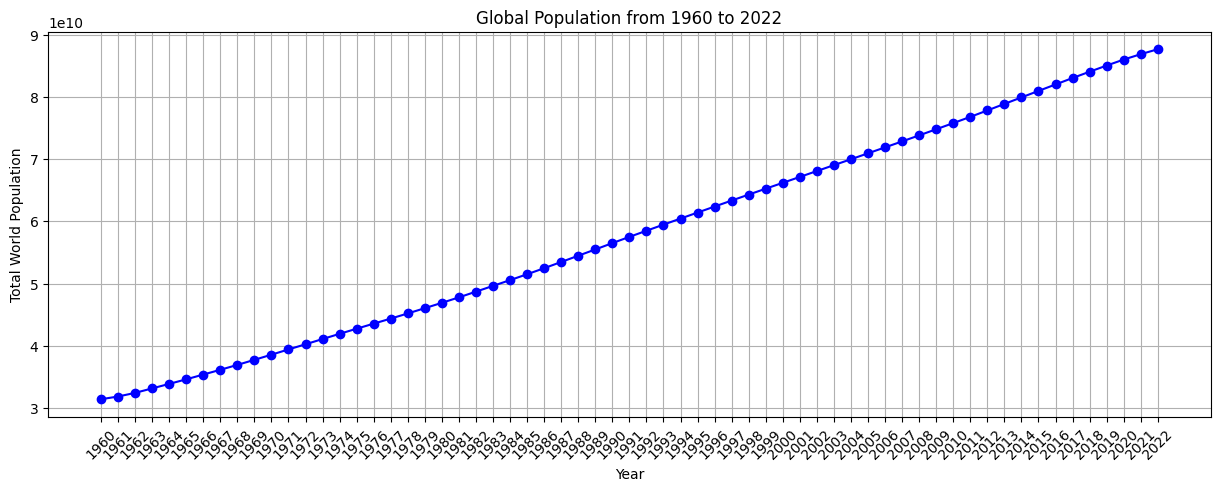

In [3]:
# Global Population Trend
# Summing up the population for each year
years = df.columns[4:]
global_population = df[years].sum()

plt.figure(figsize=(15, 5))
plt.plot(years, global_population, marker='o', color='b')
plt.xlabel('Year')
plt.ylabel('Total World Population')
plt.title('Global Population from 1960 to 2022')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 2. Histograms for Decades: 
These histograms show the distribution of population sizes among different countries for selected years (every decade). Each histogram corresponds to one year (like 1960, 1970, etc.). The x-axis shows different population sizes, and the y-axis shows how many countries have populations in those ranges. This helps us see if most countries have a small, medium, or large population.

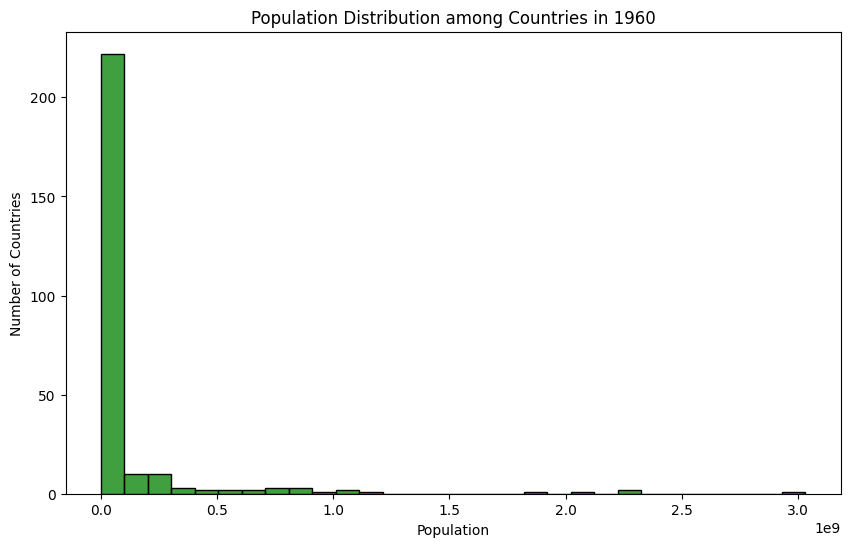

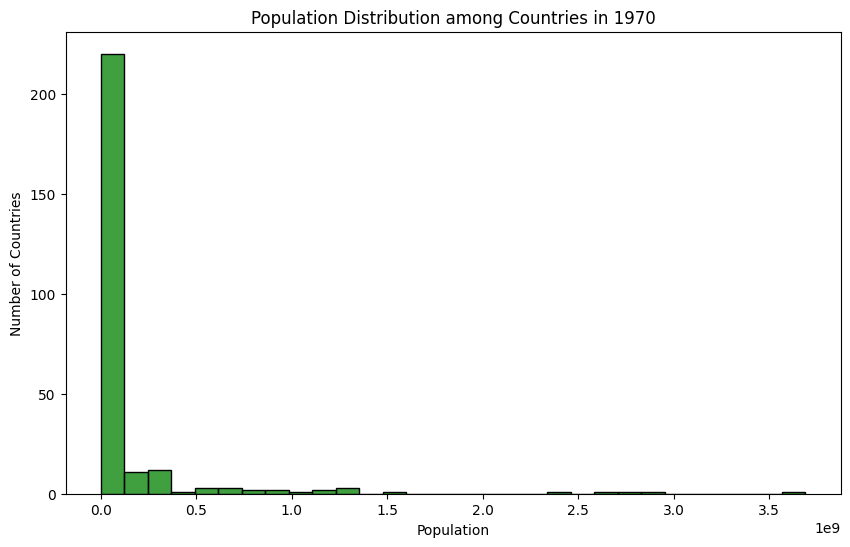

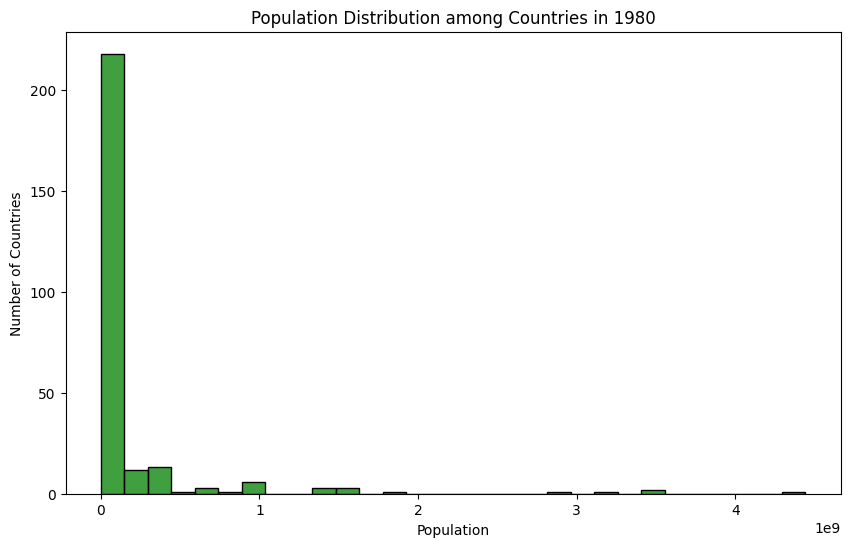

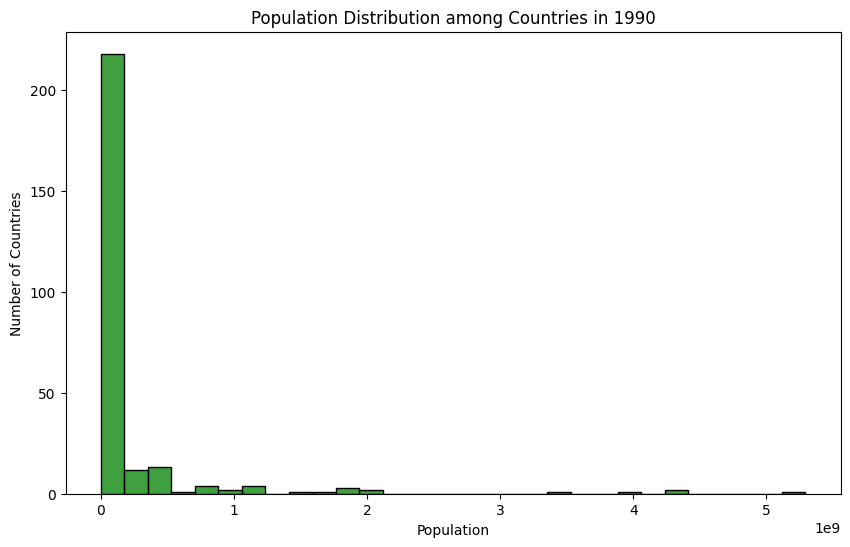

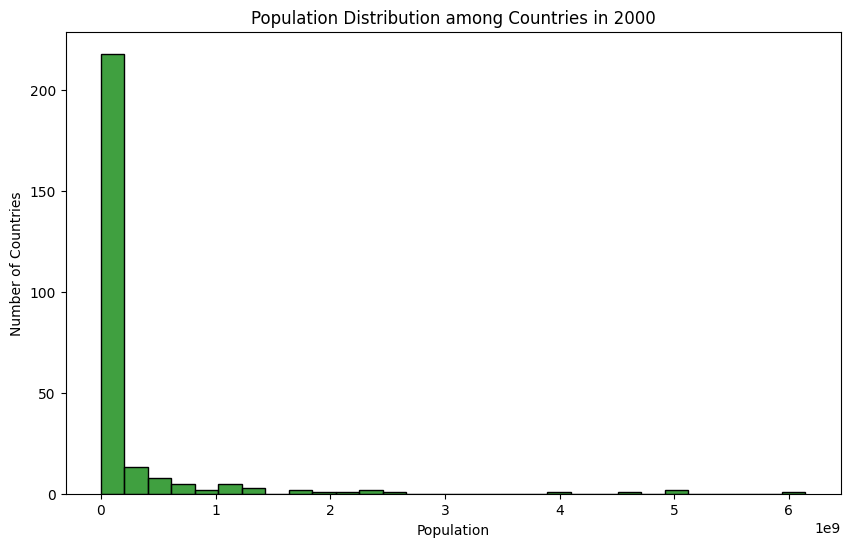

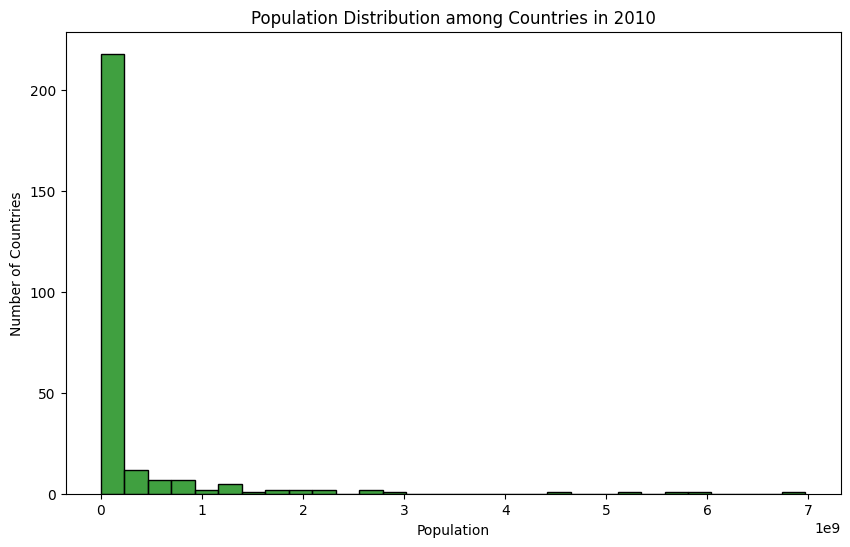

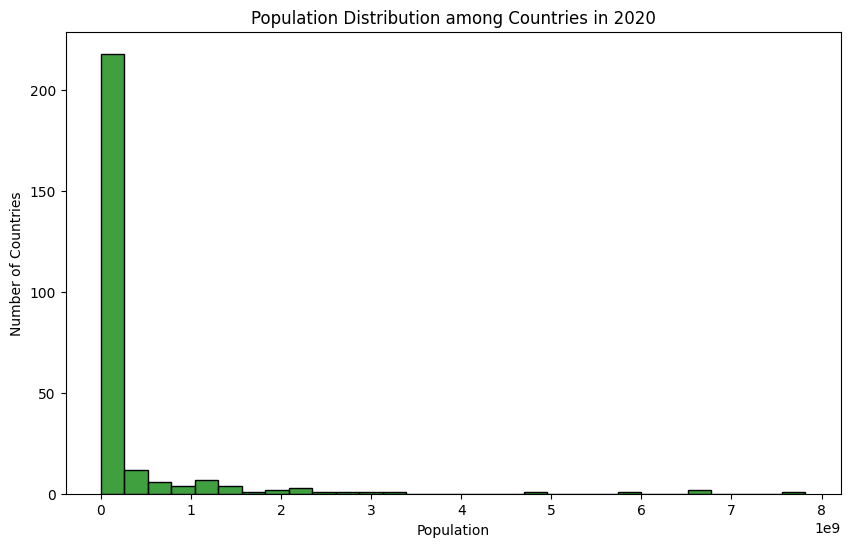

In [4]:
# Histograms for Population Distribution in Specific Years
decade_years = ['1960', '1970', '1980', '1990', '2000', '2010', '2020']
for year in decade_years:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[year], bins=30, kde=False, color='green')
    plt.xlabel('Population')
    plt.ylabel('Number of Countries')
    plt.title(f'Population Distribution among Countries in {year}')
    plt.show()

### 3. Top Countries Population Trends: 
This line graph shows the population trends from 1960 to 2022 for the top 5 countries with the highest populations in 1960. Each line represents one country. The x-axis shows the years, and the y-axis shows the population of each country. This graph helps us see how the population of these countries has changed over time.

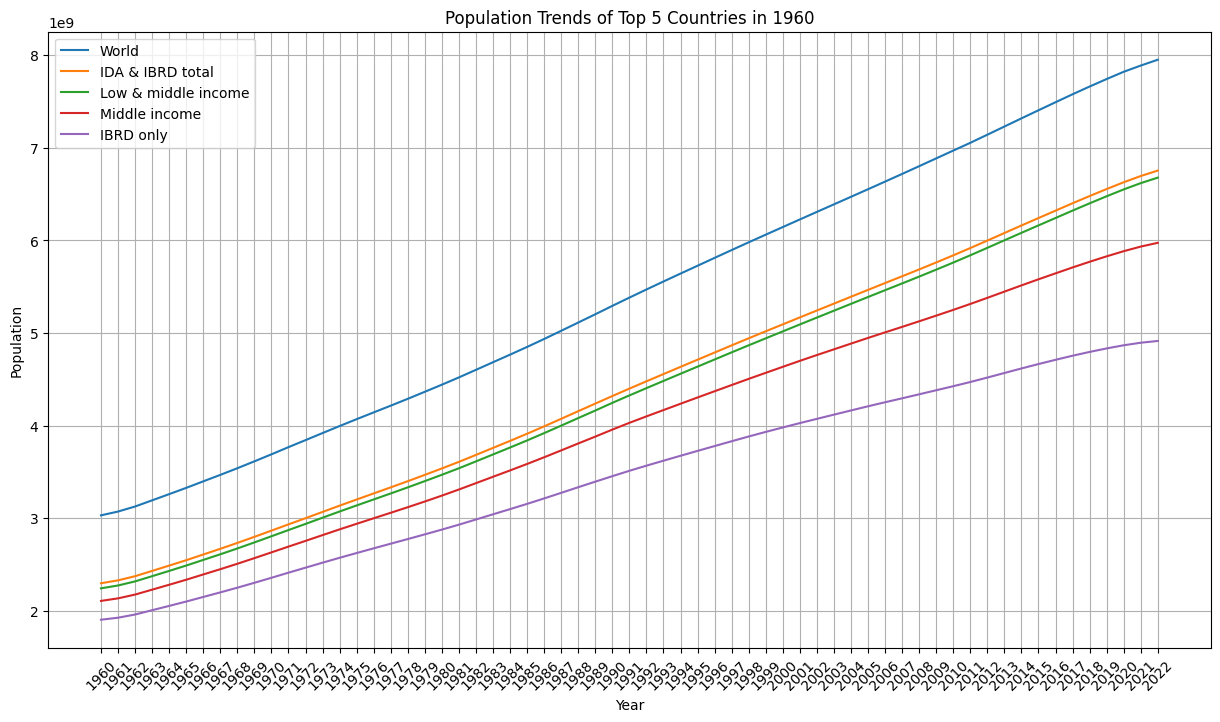

In [5]:
# Population Trends for Top 5 Countries in 1960
top_countries_1960 = df.sort_values(by='1960', ascending=False).head(5)
plt.figure(figsize=(15, 8))
for i in range(5):
    country = top_countries_1960.iloc[i]
    plt.plot(years, country[4:], marker='', label=country['Country Name'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Trends of Top 5 Countries in 1960')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 4. Top and Bottom 5 Countries by Population Growth Rate in 2022
This graph shows the top 5 and bottom 5 countries based on their population growth rates in 2022. 

The bar on the left side displays the top 5 countries with the highest population growth rates, while the bar on the right side shows the bottom 5 countries with the lowest growth rates. The length of each bar represents the percentage change in population from 2021 to 2022. Countries with longer bars experienced higher population growth, while those with shorter bars had lower growth rates during this period.

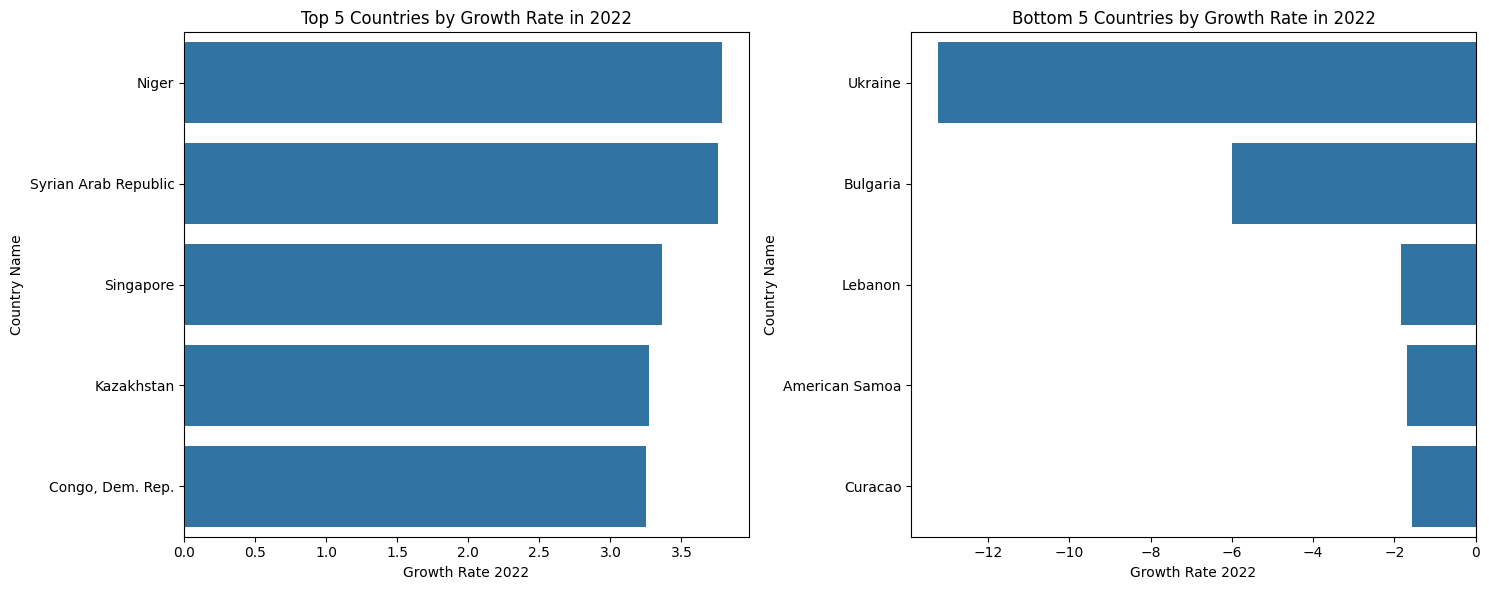

In [6]:
# Population Growth Rate Calculation for 2022
df['Growth Rate 2022'] = (df['2022'] - df['2021']) / df['2021'] * 100
top_growth_countries = df.sort_values(by='Growth Rate 2022', ascending=False).head(5)
bottom_growth_countries = df.sort_values(by='Growth Rate 2022').head(5)

# Plotting top and bottom growth rate countries
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(x='Growth Rate 2022', y='Country Name', data=top_growth_countries, ax=ax[0])
ax[0].set_title('Top 5 Countries by Growth Rate in 2022')
sns.barplot(x='Growth Rate 2022', y='Country Name', data=bottom_growth_countries, ax=ax[1])
ax[1].set_title('Bottom 5 Countries by Growth Rate in 2022')
plt.tight_layout()
plt.show()

### 5. Population Growth Rate 2010-2020: 
The bar chart shows the top 10 countries with the highest population growth rate between 2010 and 2020. This gives insights into which countries experienced rapid population changes in that decade.

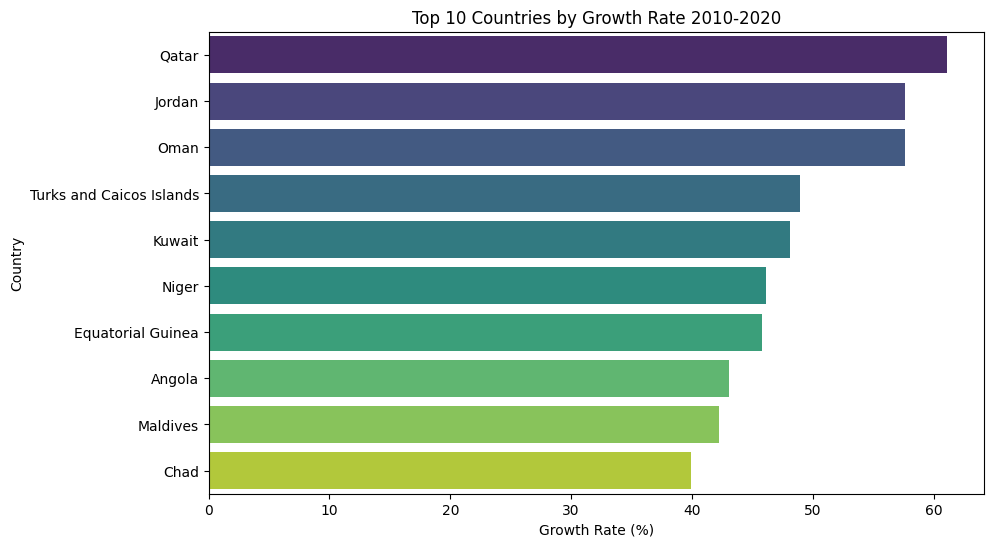

In [7]:
warnings.filterwarnings("ignore", category=FutureWarning)  # Add this line to ignore the specific FutureWarning

# Population Growth Rate Calculation
# Calculate the growth rate from 2010 to 2020
df['Growth Rate 2010-2020'] = (df['2020'] - df['2010']) / df['2010'] * 100

# Plotting top 10 countries by growth rate
top_growth_countries = df.sort_values(by='Growth Rate 2010-2020', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Growth Rate 2010-2020', y='Country Name', data=top_growth_countries, palette='viridis')
plt.title('Top 10 Countries by Growth Rate 2010-2020')
plt.xlabel('Growth Rate (%)')
plt.ylabel('Country')
plt.show()

### 6. Population Growth Rate Calculation from 1960 to 2022

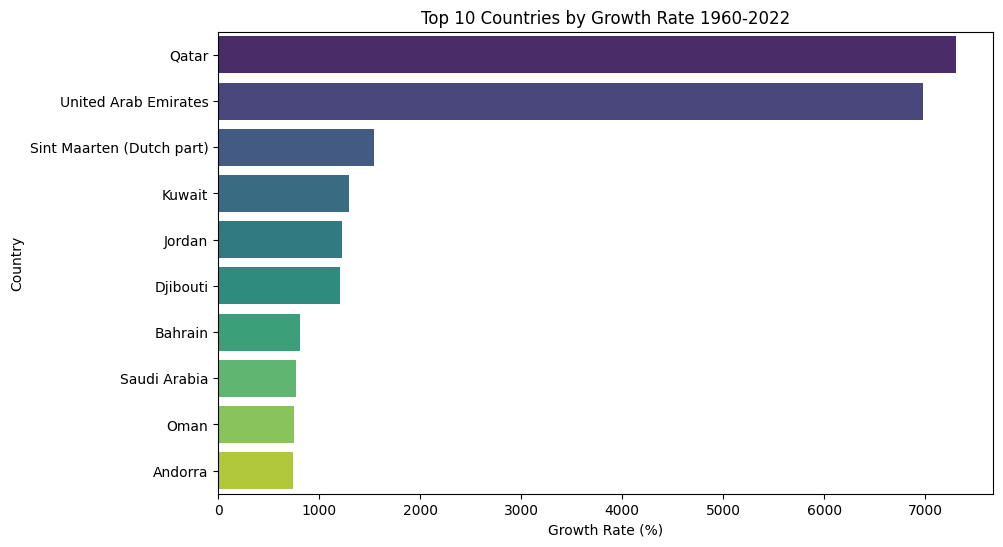

In [9]:
warnings.filterwarnings("ignore", category=FutureWarning)  # Add this line to ignore the specific FutureWarning

# Population Growth Rate Calculation from 1960 to 2022
df['Growth Rate 1960-2022'] = (df['2022'] - df['1960']) / df['1960'] * 100

# Plotting top 10 countries by growth rate
top_growth_countries = df.sort_values(by='Growth Rate 1960-2022', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Growth Rate 1960-2022', y='Country Name', data=top_growth_countries, palette='viridis')
plt.title('Top 10 Countries by Growth Rate 1960-2022')
plt.xlabel('Growth Rate (%)')
plt.ylabel('Country')
plt.show()

### 7. Population Trend in China: 
The line graph for China's population from 1960 to 2022 provides a focused look at one country's demographic trend over time.

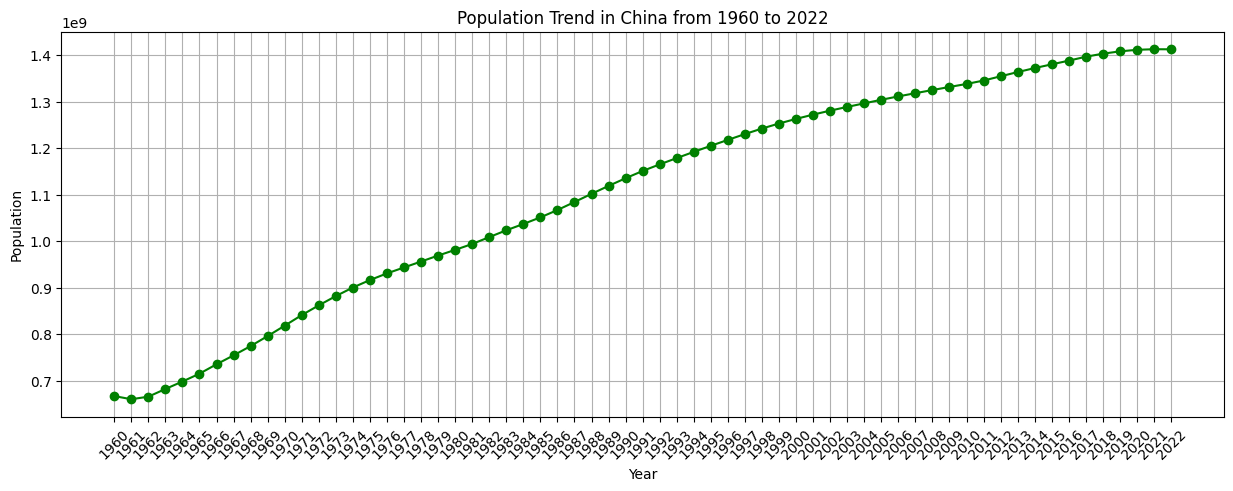

In [8]:
# Detailed Analysis for a Specific Country (e.g., China)
china_data = df[df['Country Name'] == 'China'][years].transpose()
china_data.columns = ['Population']
plt.figure(figsize=(15, 5))
plt.plot(china_data, marker='o', color='g')
plt.title('Population Trend in China from 1960 to 2022')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 8. bar chart of the total population by year

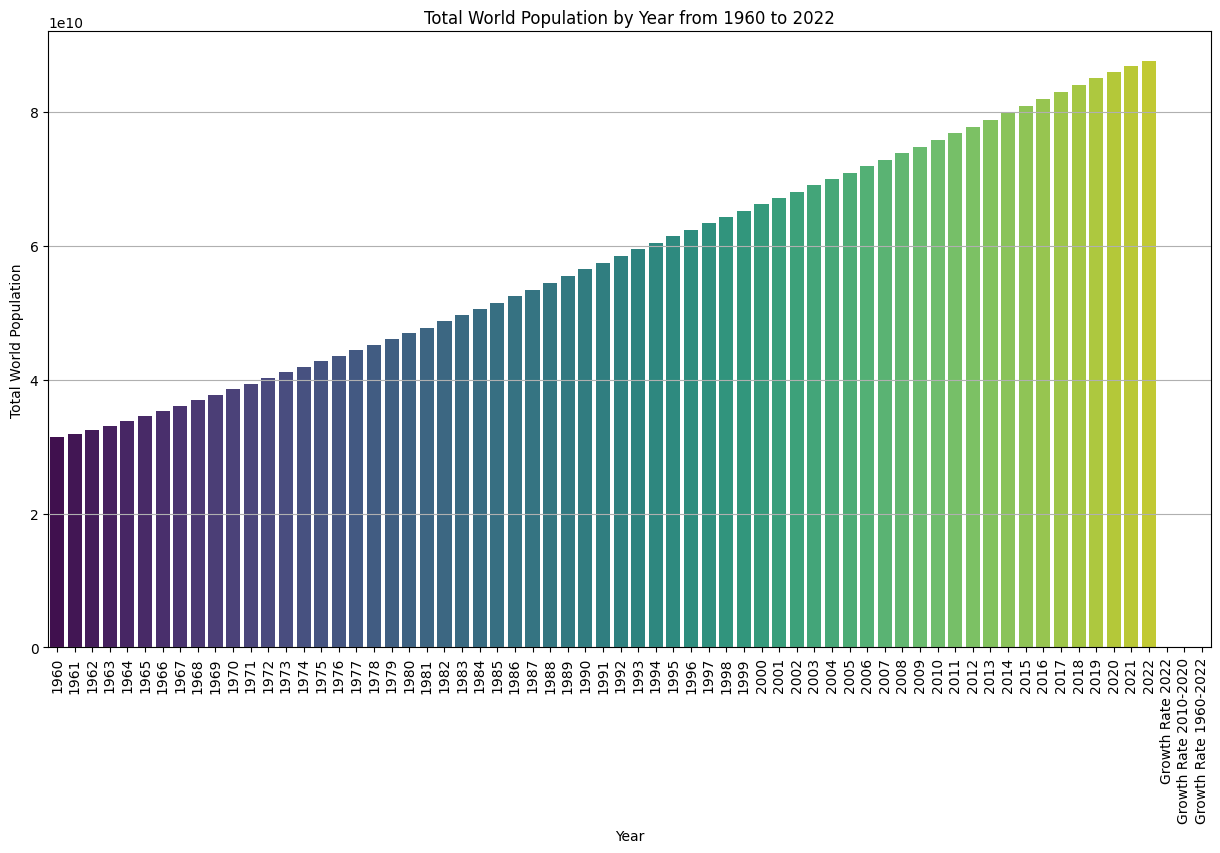

In [10]:

warnings.filterwarnings("ignore", category=FutureWarning)  # Add this line to ignore the specific FutureWarning

# Summing up the population for each year
years = df.columns[4:]
global_population = df[years].sum()

# Creating a bar chart of the total population by year
plt.figure(figsize=(15, 8))
sns.barplot(x=years, y=global_population, palette='viridis')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.xlabel('Year')
plt.ylabel('Total World Population')
plt.title('Total World Population by Year from 1960 to 2022')
plt.grid(axis='y')
plt.show()

## Population Trends of 20 Countries with Lowest Population in 1960

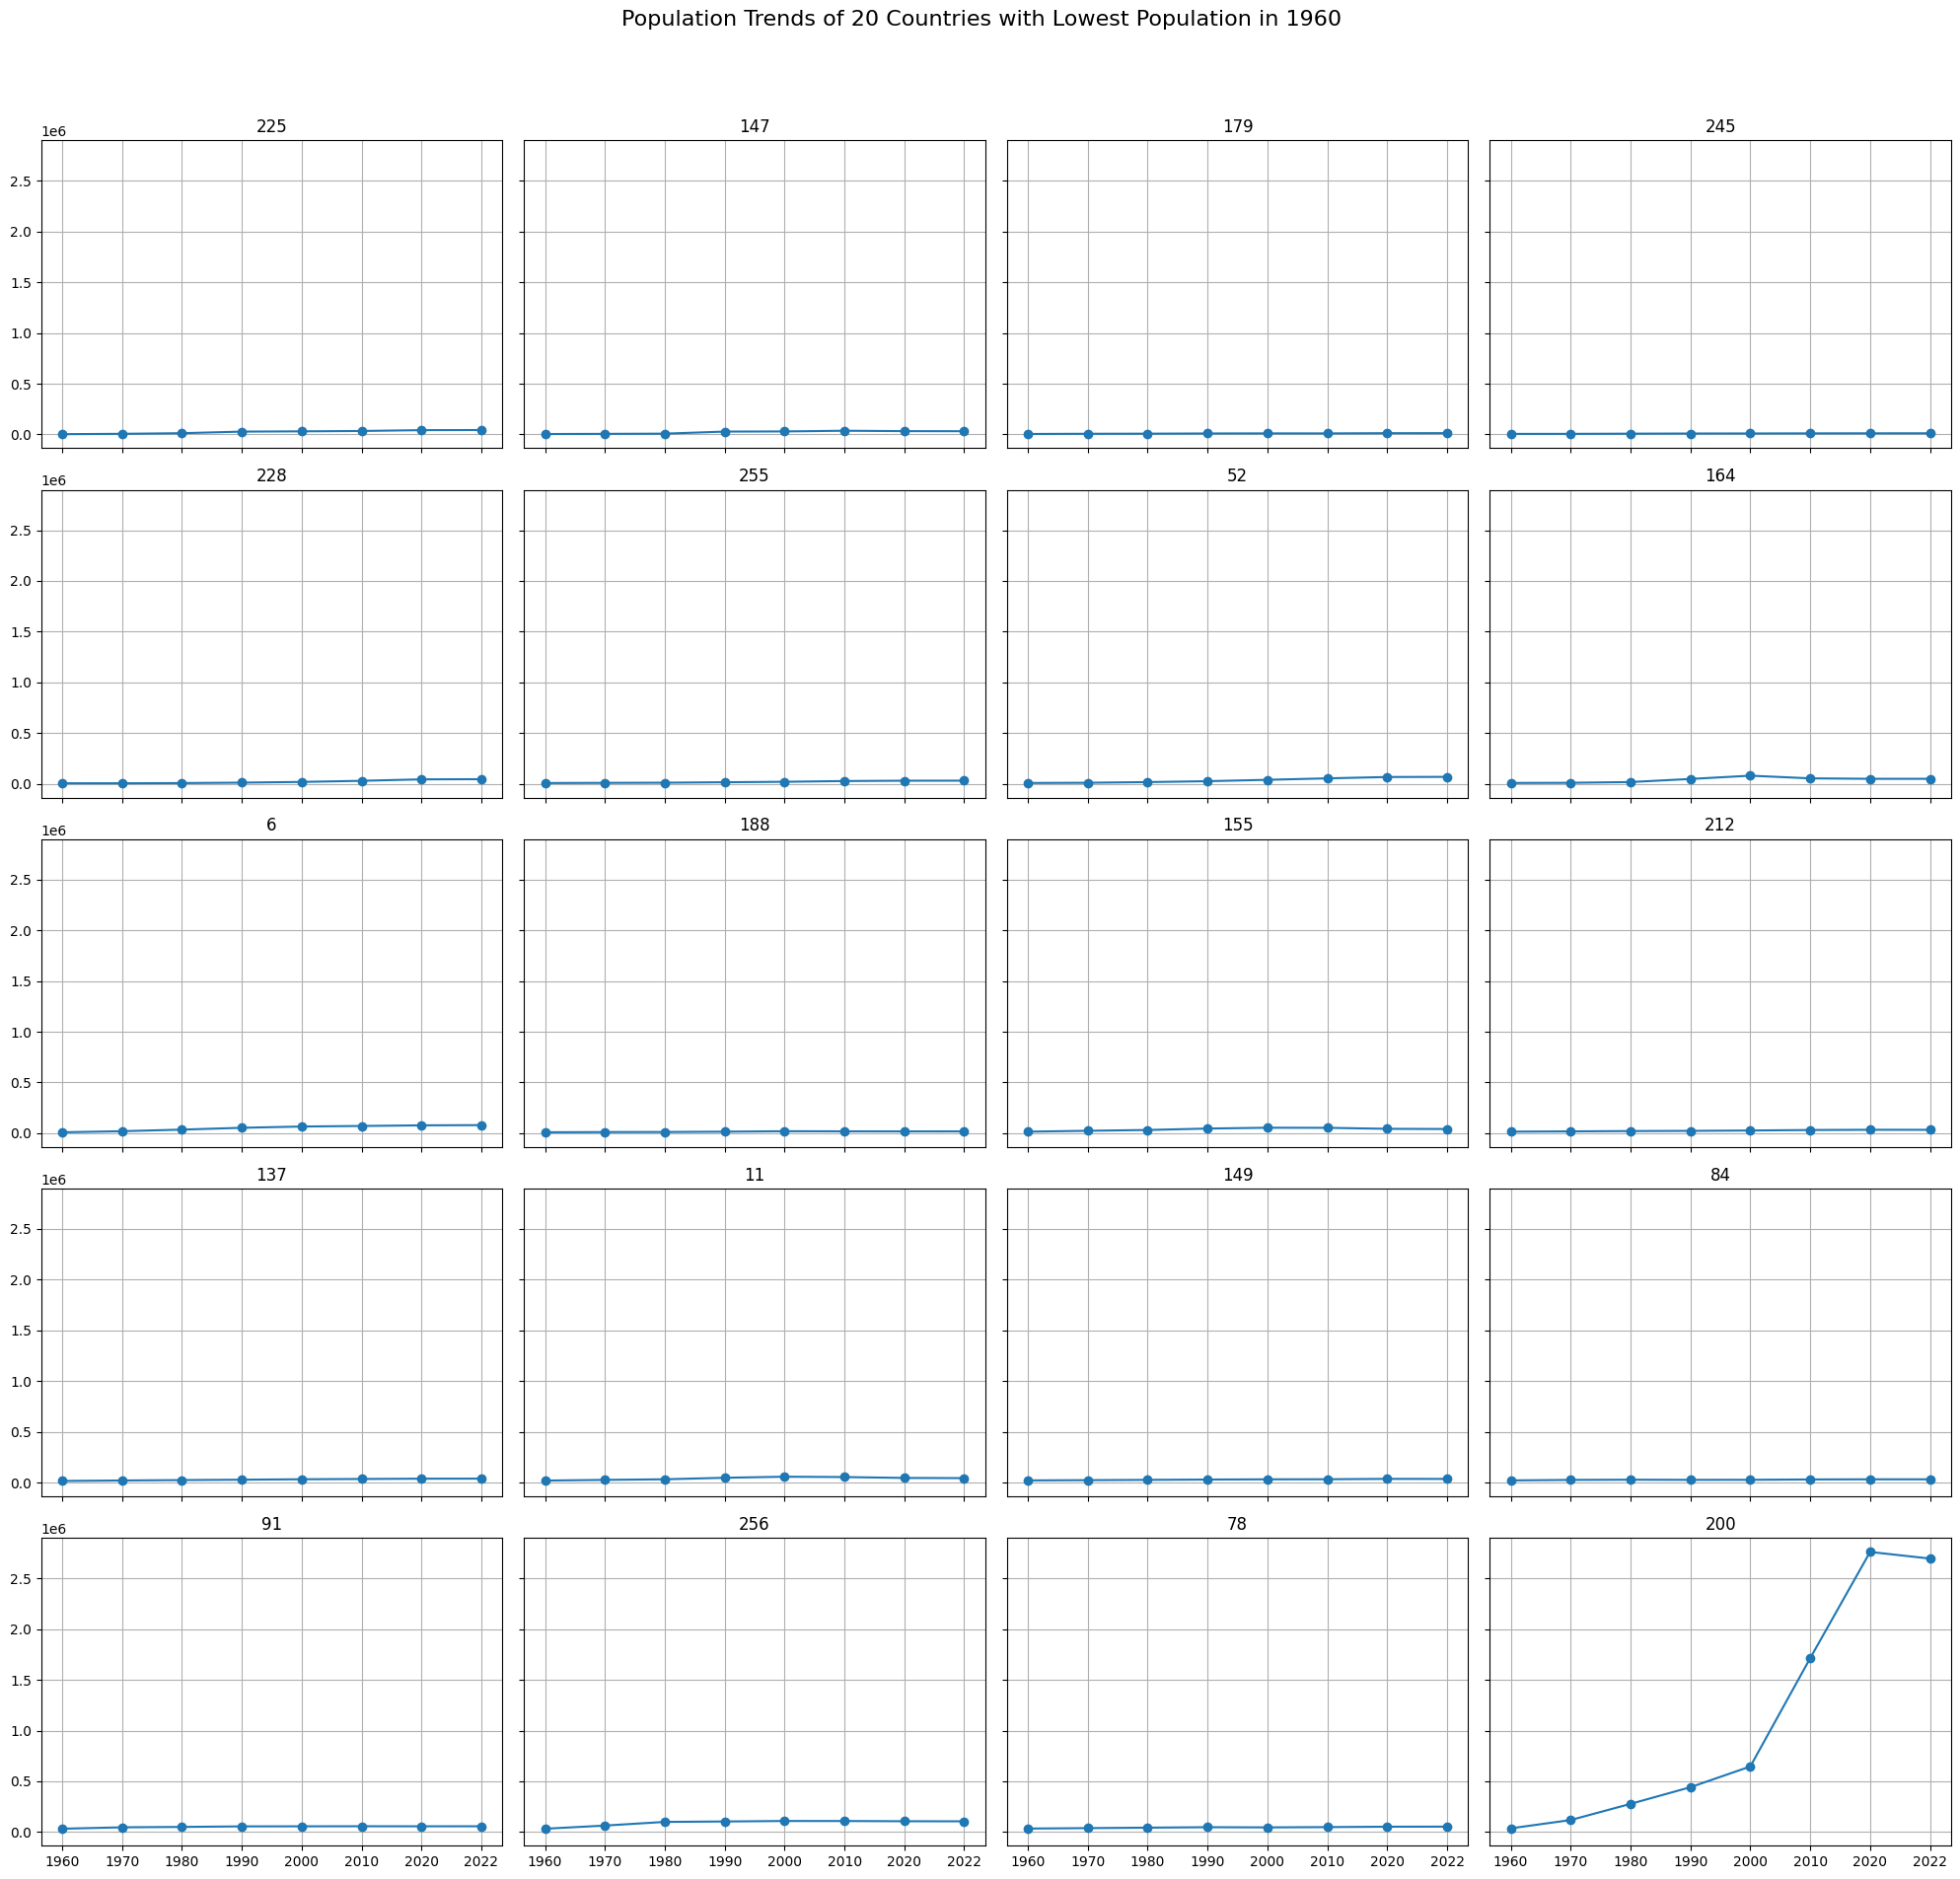

In [12]:
# Sorting and selecting the bottom 20 countries based on their population in 1960
country_by_1960 = df.sort_values(by='1960').head(20)

# Selected years for comparison
selected_years = ['1960', '1970', '1980', '1990', '2000', '2010', '2020', '2022']

# Creating small multiples
fig, axes = plt.subplots(5, 4, figsize=(20, 20), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten the 2D array of axes

for i, (country_name, data) in enumerate(country_by_1960.iterrows()):
    ax = axes[i]
    ax.plot(selected_years, data[selected_years], marker='o')
    ax.set_title(country_name)
    ax.grid(True)

plt.suptitle('Population Trends of 20 Countries with Lowest Population in 1960', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the main title
plt.show()